In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Stationarity - USILaughs

In [2]:
left_pp = [0.24, 0.048, 0.77, 0.6, 0.58, 0.57, 0.39, 0.0031, 0.027, 0.68, 0.14, 0.89, 0.52, 1, 0.99, 0.56, 0.76, 1, 1, 0.006, 0.9, 1,0.99, 0.13, 0.0011, 0.89, 1, 0.65, 0.83, 0.99, 0.56, 0.052]
right_pp = [0.26, 0.12, 0.84, 0.95, 0.58, 0.65, 0.95, 0.98, 0.0023, 0.92, 0.55, 0.97, 0.41, 0.81, 0.14, 0.58, 0.078, 0.0036, 0.81, 0.86, 0.58, 1, 0.88, 0.42, 0.0012, 0.069, 1, 1, 0.22, 1, 0.24, 0.15]

left_kpss = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 0.96, 1, 1]
right_kpss = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

left_dfgls = [0.14, 1, 0.53, 0.072, 0.99, 0.87, 0.98, 0.77, 0.74, 0.65, 1, 0.55, 0.14, 0.95, 0.23, 0.36, 0.095, 0.87, 0.014, 1, 0.27, 0.96, 0.066, 1, 0.96, 1, 0.036, 0.87, 0.52, 0.0014, 0.71, 0.95]
right_dfgls =[0.17, 1, 0.58, 0.21, 0.99, 1, 0.85, 0.22, 1, 0.86, 0.77, 0.2, 0.37, 0.74, 0.94, 0.44, 0.4, 0.99, 1, 0.61, 0.31, 0.84, 0.076, 1, 0.99, 1, 0.57, 0.0009, 0.76, 0.82, 0.44, 0.98]

left_adf = [0.45, 0.0068, 0.73, 0.71, 0.67, 0.42, 0.28, 0.001, 0.084, 0.77, 0.27, 0.76, 0.8, 1, 0.91, 0.51, 0.81, 1,1, 0.0099, 0.79, 1, 0.98, 0.24, 0.0012, 1, 0.99, 0.63, 0.54, 0.98, 0.36, 0.066]
right_adf = [0.41, 0.12, 0.76, 0.93, 0.63, 0.94, 0.89, 0.76, 0.0026, 0.51, 0.42, 0.88, 0.44, 0.73, 0.022, 0.89, 0.13, 0.004, 0.96, 0.84, 0.44, 1, 0.79, 0.48, 0.00093, 0.011, 0.97, 1, 0.047, 1, 0.14, 0.19]

In [3]:
# make dataframe with multi index columns. First level should be left/right, and second level test name
df = pd.DataFrame([left_pp, right_pp, left_kpss, right_kpss, left_dfgls, right_dfgls, left_adf, right_adf]).T
# make the multi index from tuples, where first you have the side and then the test name
df.columns = pd.MultiIndex.from_tuples([('left', 'pp'), ('right', 'pp'), ('left', 'kpss'), ('right', 'kpss'), ('left', 'dfgls'), ('right', 'dfgls'), ('left', 'adf'), ('right', 'adf')])
# sort by the first level of the multi index
df = df.sort_index(axis=1, level=0)

In [4]:
# make a separate dataframe for each test type
pp = df.xs('pp', axis=1, level=1)
kpss = df.xs('kpss', axis=1, level=1)
dfgls = df.xs('dfgls', axis=1, level=1)
adf = df.xs('adf', axis=1, level=1)

dataframes: dict[str, pd.DataFrame] = {'Philip-Perron': pp, 'KPSS': kpss, 'DFGLS': dfgls, 'ADF': adf}

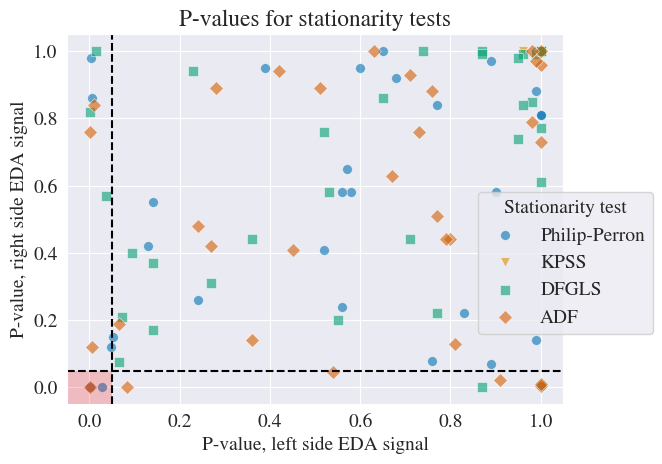

In [12]:
# make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
# and the color is determined by the test name
# make a list of markers
markers = ["o", "v", "s", "D"]

# set golden ratio figure size
plt.figure(figsize=(6.4, 4.8))

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=4)

# make the scatterplot
for marker, col, (test_name, df) in zip(markers, palette, dataframes.items()):
    sns.scatterplot(
        data=df,
        x="left",
        y="right",
        label=test_name,
        marker=marker,
        s=50,
        alpha=0.6,
        color=col,
    )
plt.xlabel("P-value, left side EDA signal")
plt.ylabel("P-value, right side EDA signal")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.6), title="Stationarity test")
plt.title("P-values for stationarity tests")
# draw one vertical lines at 0.05
plt.axvline(0.05, color="black", linestyle="--")
# draw one horizontal line at 0.05
plt.axhline(0.05, color="black", linestyle="--")

# leg.get_title().set_text('Stationarity test')
# draw a rectangle around the points that are significant for both sides
plt.gca().add_patch(
    patches.Rectangle(
        (-0.05, -0.05), 0.1, 0.1, fill=True, linestyle="none", color="red", alpha=0.2
    )
)
plt.savefig("../final_visualizations/stationarity_tests-usilaughs.pdf", bbox_inches="tight")
plt.show()


# Stationarity MWC2022

In [ ]:
left_pp = [0.24, 0.048, 0.77, 0.6, 0.58, 0.57, 0.39, 0.0031, 0.027, 0.68, 0.14, 0.89, 0.52, 1, 0.99, 0.56, 0.76, 1, 1, 0.006, 0.9, 1,0.99, 0.13, 0.0011, 0.89, 1, 0.65, 0.83, 0.99, 0.56, 0.052]
right_pp = [0.26, 0.12, 0.84, 0.95, 0.58, 0.65, 0.95, 0.98, 0.0023, 0.92, 0.55, 0.97, 0.41, 0.81, 0.14, 0.58, 0.078, 0.0036, 0.81, 0.86, 0.58, 1, 0.88, 0.42, 0.0012, 0.069, 1, 1, 0.22, 1, 0.24, 0.15]

left_kpss = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 0.96, 1, 1]
right_kpss = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

left_dfgls = [0.14, 1, 0.53, 0.072, 0.99, 0.87, 0.98, 0.77, 0.74, 0.65, 1, 0.55, 0.14, 0.95, 0.23, 0.36, 0.095, 0.87, 0.014, 1, 0.27, 0.96, 0.066, 1, 0.96, 1, 0.036, 0.87, 0.52, 0.0014, 0.71, 0.95]
right_dfgls =[0.17, 1, 0.58, 0.21, 0.99, 1, 0.85, 0.22, 1, 0.86, 0.77, 0.2, 0.37, 0.74, 0.94, 0.44, 0.4, 0.99, 1, 0.61, 0.31, 0.84, 0.076, 1, 0.99, 1, 0.57, 0.0009, 0.76, 0.82, 0.44, 0.98]

left_adf = [0.45, 0.0068, 0.73, 0.71, 0.67, 0.42, 0.28, 0.001, 0.084, 0.77, 0.27, 0.76, 0.8, 1, 0.91, 0.51, 0.81, 1,1, 0.0099, 0.79, 1, 0.98, 0.24, 0.0012, 1, 0.99, 0.63, 0.54, 0.98, 0.36, 0.066]
right_adf = [0.41, 0.12, 0.76, 0.93, 0.63, 0.94, 0.89, 0.76, 0.0026, 0.51, 0.42, 0.88, 0.44, 0.73, 0.022, 0.89, 0.13, 0.004, 0.96, 0.84, 0.44, 1, 0.79, 0.48, 0.00093, 0.011, 0.97, 1, 0.047, 1, 0.14, 0.19]

In [ ]:
# make dataframe with multi index columns. First level should be left/right, and second level test name
df = pd.DataFrame([left_pp, right_pp, left_kpss, right_kpss, left_dfgls, right_dfgls, left_adf, right_adf]).T
# make the multi index from tuples, where first you have the side and then the test name
df.columns = pd.MultiIndex.from_tuples([('left', 'pp'), ('right', 'pp'), ('left', 'kpss'), ('right', 'kpss'), ('left', 'dfgls'), ('right', 'dfgls'), ('left', 'adf'), ('right', 'adf')])
# sort by the first level of the multi index
df = df.sort_index(axis=1, level=0)

In [ ]:
# make a separate dataframe for each test type
pp = df.xs('pp', axis=1, level=1)
kpss = df.xs('kpss', axis=1, level=1)
dfgls = df.xs('dfgls', axis=1, level=1)
adf = df.xs('adf', axis=1, level=1)

dataframes: dict[str, pd.DataFrame] = {'Philip-Perron': pp, 'KPSS': kpss, 'DFGLS': dfgls, 'ADF': adf}

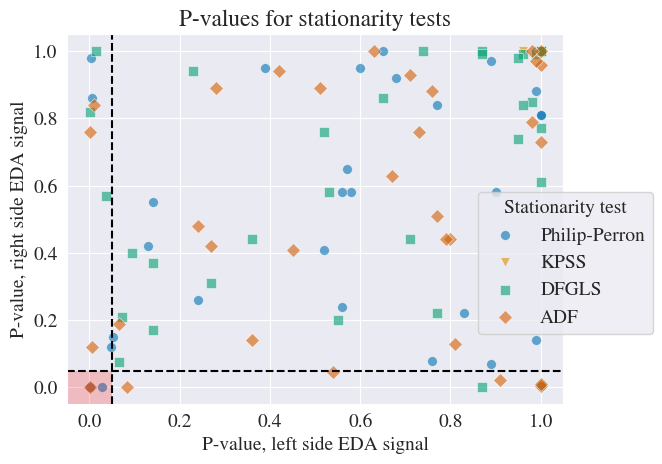

In [ ]:
# make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
# and the color is determined by the test name
# make a list of markers
markers = ["o", "v", "s", "D"]

# set golden ratio figure size
plt.figure(figsize=(6.4, 4.8))

# set seaborn style
sns.set_style("darkgrid")

# # set latex font
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

# increase font size
plt.rcParams.update({"font.size": 14})

# get a color palette
palette = sns.color_palette("colorblind", n_colors=4)

# make the scatterplot
for marker, col, (test_name, df) in zip(markers, palette, dataframes.items()):
    sns.scatterplot(
        data=df,
        x="left",
        y="right",
        label=test_name,
        marker=marker,
        s=50,
        alpha=0.6,
        color=col,
    )
plt.xlabel("P-value, left side EDA signal")
plt.ylabel("P-value, right side EDA signal")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 0.6), title="Stationarity test")
plt.title("P-values for stationarity tests")
# draw one vertical lines at 0.05
plt.axvline(0.05, color="black", linestyle="--")
# draw one horizontal line at 0.05
plt.axhline(0.05, color="black", linestyle="--")

# leg.get_title().set_text('Stationarity test')
# draw a rectangle around the points that are significant for both sides
plt.gca().add_patch(
    patches.Rectangle(
        (-0.05, -0.05), 0.1, 0.1, fill=True, linestyle="none", color="red", alpha=0.2
    )
)
plt.savefig("../final_visualizations/stationarity_tests-usilaughs.pdf", bbox_inches="tight")
plt.show()
